## Step 3 - Exploring Data & Visualizing

In this step, we will Visualizing and understanding the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("IMDb_rating_data_without_nan.csv",index_col = 0)
data.head()

,Name,Genre,ID,Year,Imdb Rating,Director,Votes,Gross,malesRating,malesCount,femalesRating,femalesCount
0,The Dark Knight,Action,tt0468569,2008,9.0,Christopher Nolan,"2,556,384",534.86,9.0,"1,476,807",8.7,"264,598"
1,The Lord of the Rings: The Return of the King,Action,tt0167260,2003,9.0,Peter Jackson,"1,777,166",377.85,9.0,"1,027,904",8.9,"218,150"
2,K.G.F: Chapter 2,Action,tt10698680,2022,8.9,Prashanth Neel,"93,320",92.52,8.3,"13,286",7.5,428
3,Everything Everywhere All at Once,Action,tt6710474,2022,8.8,Dan Kwan,"39,711",92.52,8.7,"17,826",8.7,"3,781"
4,Inception,Action,tt1375666,2010,8.8,Christopher Nolan,"2,269,287",292.58,8.8,"1,260,681",8.7,"293,467"


Text(0, 0.5, 'Frequency')

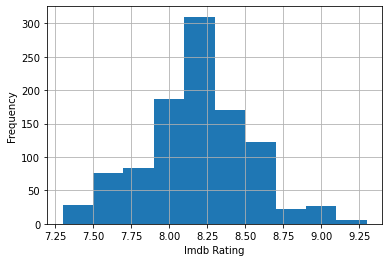

In [3]:
data['Imdb Rating'].hist(bins=10)
plt.xlabel('Imdb Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

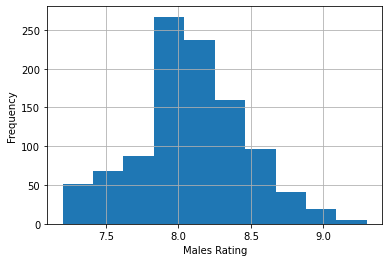

In [4]:
data['malesRating'].hist(bins=10)
plt.xlabel('Males Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

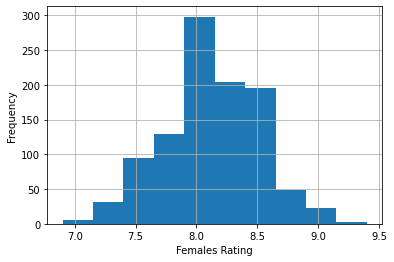

In [5]:
data['femalesRating'].hist(bins=10)
plt.xlabel('Females Rating')
plt.ylabel('Frequency')

In [32]:
## ---------------------------------------------
def plot_frequent_elements(df, df_in_params):
    fig, axes = plt.subplots(1, 2, figsize=(20,5))
    for i, row in df_in_params.iterrows():
        series = get_frequent_elements(df, row.loc['col_name'], row.loc['Genre'])
        one_dim_plot(series, row.loc['plot_type'], axes[i])
## ---------------------------------------------        
def get_frequent_elements(df, col_name, num_top_elements):
    temp_df = df.copy()
    series = temp_df[col_name].value_counts()[:num_top_elements].sort_index(ascending=True)
    return series
## ---------------------------------------------
def one_dim_plot(sr, plot_type, axis):
    sr.plot(kind=plot_type,ax=axis)
## ---------------------------------------------

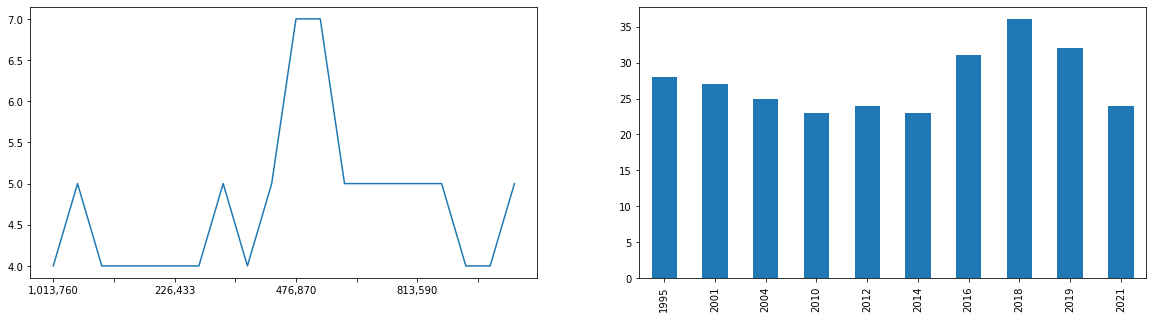

In [37]:
df_params = pd.DataFrame({'plot_type': ['line', 'bar'], 'col_name': ['Votes', 'Year'],'Genre': [20,10]})
plot_frequent_elements(data, df_params)

In [39]:
print ("Crosstab by Genre & Imdb Rating")
ct1 = pd.crosstab(data['Genre'],data['Imdb Rating'])
ct1

crostab


Imdb Rating,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.2,9.3
Genre,,,,,,,,,,,,,,,,,,,,
Action,0,0,0,0,0,0,0,0,0,20,3,11,3,4,2,4,1,2,0,0
Adventure,0,0,0,0,0,0,0,0,6,14,8,9,3,3,1,5,0,1,0,0
Animation,0,0,0,0,0,6,6,15,8,4,3,5,2,1,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,14,14,10,3,4,3,0,1,0,0,1,0,0
Comedy,0,0,0,0,0,0,0,0,13,15,9,5,5,1,0,1,0,0,0,1
Crime,0,0,0,0,0,0,0,0,0,15,13,5,4,4,1,0,3,4,1,0
Drama,0,0,0,0,0,0,0,0,0,0,0,3,19,10,3,4,3,5,1,2
Family,0,0,0,0,0,0,11,12,11,5,5,3,1,2,0,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,15,12,6,3,5,0,4,1,3,0,1,0,0


In [40]:
print ("Crosstab by Genre & malesRating")
ct2 = pd.crosstab(data['Genre'],data['malesRating'])
ct2

Crosstab by Genre & malesRating


malesRating,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8.0,8.1,...,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.2,9.3
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0,0,0,0,0,0,0,2,5,5,...,10,4,2,4,2,5,0,2,0,0
Adventure,0,0,0,0,0,0,0,1,4,4,...,12,4,2,4,1,4,1,1,0,0
Animation,0,0,0,0,1,5,3,13,14,2,...,6,2,2,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,7,14,11,...,4,1,2,0,1,0,0,1,0,0
Comedy,0,0,0,0,0,0,0,2,4,11,...,10,2,4,2,1,0,0,0,1,0
Crime,0,0,0,0,0,0,0,1,3,6,...,13,5,3,3,2,1,0,4,1,0
Drama,0,0,0,0,0,0,0,0,1,1,...,2,2,15,8,5,4,0,6,2,1
Family,0,0,0,0,0,0,7,12,13,5,...,5,2,1,1,0,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,10,15,5,...,7,0,1,3,1,3,0,1,0,0


In [41]:
print ("Crosstab by Genre & femalesRating")
ct3 = pd.crosstab(data['Genre'],data['femalesRating'])
ct3

Crosstab by Genre & femalesRating


femalesRating,6.9,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,...,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.1,9.3,9.4
Genre,,,,,,,,,,,,,,,,,,,,,
Action,1,0,1,1,0,1,0,1,0,4,...,5,5,1,4,1,1,0,0,0,0
Adventure,0,0,0,0,0,0,0,0,1,3,...,8,6,2,4,2,1,0,0,0,0
Animation,0,0,0,0,0,0,0,1,3,6,...,8,2,4,1,1,0,0,0,0,0
Biography,0,0,0,0,0,0,1,2,2,5,...,6,0,1,2,0,0,2,0,0,0
Comedy,1,0,0,0,0,0,0,1,2,1,...,12,5,1,2,0,1,0,0,0,1
Crime,1,0,2,1,1,1,2,3,2,3,...,7,3,2,2,1,3,0,0,0,0
Drama,0,0,0,0,0,1,1,1,0,2,...,8,3,7,8,3,4,2,0,1,1
Family,0,0,0,0,0,0,0,0,2,3,...,11,3,4,1,1,0,0,0,0,0
Fantasy,0,0,0,0,0,1,0,3,0,1,...,6,4,4,4,1,1,0,0,0,0


In [ ]:
tempadata = data.copy() # data.set_index("Genre", inplace = False)
aasd = tempadata[tempadata['Genre'] == 'Action']
sss = aasd['femalesRating']

ctab_Rating = pd.crosstab(aasd, sss,normalize=True)
ctab_Rating
ctab_Rating.plot(kind='line',figsize=(18,8))
plt.title('',fontsize=30)
plt.xlabel('')
plt.ylabel('')


Text(0, 0.5, '')

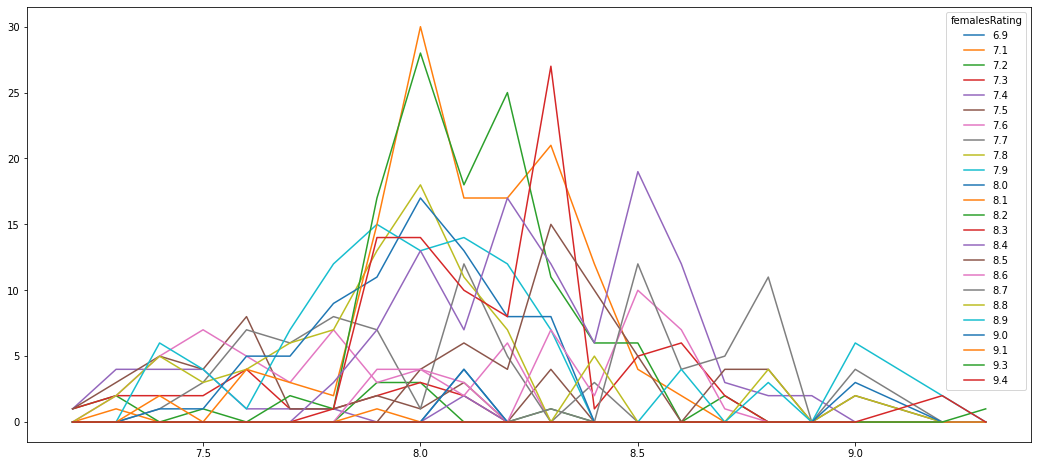

In [12]:
ctab_Dog_Friendly = pd.crosstab(data['malesRating'],data['femalesRating'],normalize=False)
ctab_Dog_Friendly
ctab_Dog_Friendly.plot(kind='line',figsize=(18,8))
plt.title('',fontsize=30)
plt.xlabel('')
plt.ylabel('')

In [14]:
#---------------------------
def plot_high_correlated_scatters(df):
    correlations, tuple_arr = get_highly_correlated_cols(df)
    fig, ax = plt.subplots(1, len(correlations), figsize=(20,5))

    indx_sort = np.argsort(correlations)
    for i, n_correlation in enumerate(indx_sort): 
        col_lt, col_rt = tuple_arr[n_correlation]
        col_lt_name = df.columns[tuple_arr[i][0]]
        col_rt_name = df.columns[tuple_arr[i][1]]
        title = "corr('%s', '%s')=%4.2f" %(col_lt_name, col_rt_name, correlations[n_correlation])
        sns.regplot(x=df.columns[tuple_arr[i][0]], y=df.columns[tuple_arr[i][1]], data=df, ax=ax[i], fit_reg=False).set_title(title)
#---------------------------
def get_highly_correlated_cols(df):
    correlatedColumns = []
    corr = df.corr(method='pearson')
    print (corr)
    indices = corr.index
    columns = corr.columns
    posthreshold = 0.5
        
    for cInd, c in enumerate(columns):
        for rInd, r in enumerate(indices):
            if (c != r) and (corr[c][r] > posthreshold) and (not is_in_array(correlatedColumns, cInd, rInd)):
                correlatedColumns.append({"column" : cInd , "row" : rInd , "val" :corr[c][r] })

    correlations = []
    tuple_arr = []
    for item in correlatedColumns:
        correlations.append(item["val"])
        my_tuple = item["column"], item["row"]
        tuple_arr.append(my_tuple)
    return correlations, tuple_arr
#---------------------------
def is_in_array(correlatedColumns, c, r):
    for item in correlatedColumns:
        if (item["column"] == c and item["row"] == r) or (item["row"] == r and item["column"] == c) or (item["column"] == r and item["row"] == c) or (item["row"] == c and item["column"] == r):
            return True
    return False
#---------------------------

               Imdb Rating  malesRating  femalesRating
Imdb Rating       1.000000     0.966749       0.698592
malesRating       0.966749     1.000000       0.699741
femalesRating     0.698592     0.699741       1.000000


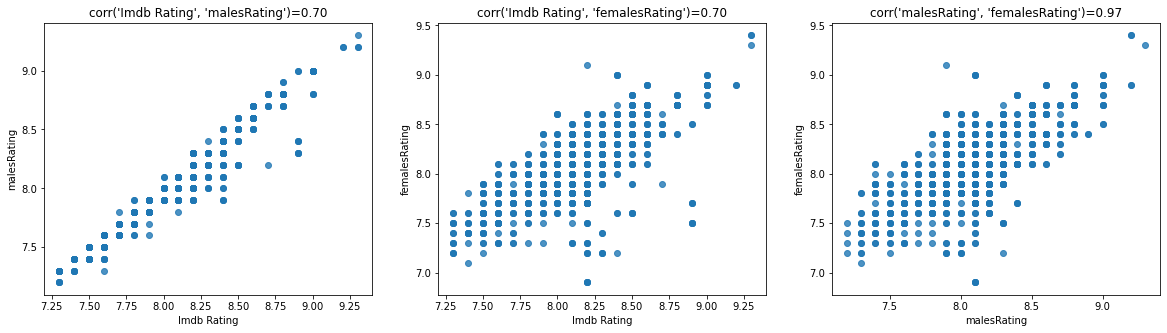

In [15]:
cols_for_correlations = ['Imdb Rating', 'malesRating', 'femalesRating']
plot_high_correlated_scatters(data[cols_for_correlations])

In [43]:
data_ratePerGenre = []
genres = data["Genre"].drop_duplicates(inplace=False).reset_index(drop=True)
genres

df_ByGenre = pd.DataFrame(data, 
                columns =["Genre",'malesRating', 'femalesRating'])
df_ByGenre.set_index("Genre", inplace = True)

for genre in genres:
    tempPerGenre = df_ByGenre.loc[[genre]]
    tempMeanOfMales = round(tempPerGenre["malesRating"].mean(), 2)
    tempMeanOfFemales = round(tempPerGenre["femalesRating"].mean(), 2)
    data_ratePerGenre.append({"Genre":genre, "Avg of Males": tempMeanOfMales, "Avg of Females":tempMeanOfFemales})

print ("Table of Avgs per Genre")
    
df_ratePerGenre = pd.DataFrame(data_ratePerGenre)
df_ratePerGenre.set_index('Genre', inplace = True)
df_ratePerGenre

Table of Avgs per Genre


,Avg of Males,Avg of Females
Genre,,
Action,8.35,8.20
Adventure,8.34,8.33
Animation,8.01,8.20
Biography,8.13,8.18
Comedy,8.25,8.26
Crime,8.37,8.11
Drama,8.62,8.51
Family,8.04,8.26
Fantasy,8.18,8.30


In [74]:
data_ratePerGenre = []
genres = data["Genre"].drop_duplicates(inplace=False).reset_index(drop=True)
genres

df_ByGenre = pd.DataFrame(data, 
                columns =["Genre",'malesCount', 'femalesCount'])
df_ByGenre.set_index("Genre", inplace = True)


for genre in genres:
    tempPerGenre = df_ByGenre.loc[[genre]]
    df = pd.DataFrame([int(val.replace(',','')) for val in tempPerGenre["malesCount"]])
    tempMeanOfMales = round(df.values.mean(), 2)
    df = pd.DataFrame([int(val.replace(',','')) for val in tempPerGenre["femalesCount"]])
    tempMeanOfFemales = round(df.values.mean(), 2)
    data_ratePerGenre.append({"Genre":genre, "Avg of count vote males": tempMeanOfMales, "Avg of count vote females":tempMeanOfFemales})

print ("Table of Avgs vote per Genre")
    
df_ratePerGenre = pd.DataFrame(data_ratePerGenre)
df_ratePerGenre.set_index('Genre', inplace = True)
df_ratePerGenre

Table of Avgs vote per Genre


,Avg of count vote males,Avg of count vote females
Genre,,
Action,425652.88,74362.42
Adventure,429969.76,91000.32
Animation,205651.86,60517.82
Biography,221082.24,48041.62
Comedy,229989.88,55146.98
Crime,406812.34,68941.84
Drama,543083.28,109971.64
Family,213788.80,65198.00
Fantasy,293560.74,73012.78


Comparison of averages by genre


Text(0, 0.5, 'Rating')

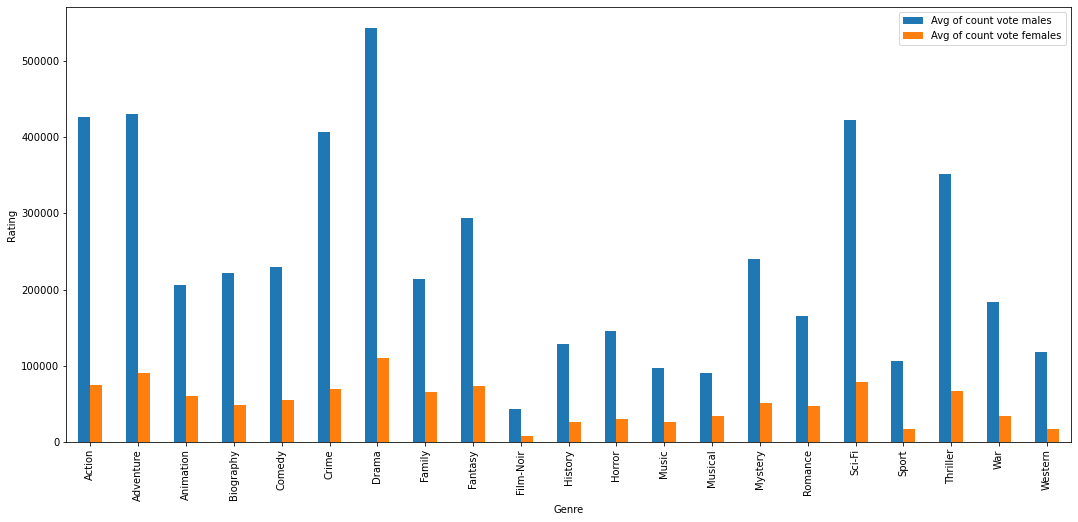

In [75]:
print ("Comparison of averages by genre")
df_ratePerGenre.plot(kind='bar',figsize=(18,8))
plt.xlabel('Genre')
plt.ylabel('Rating')

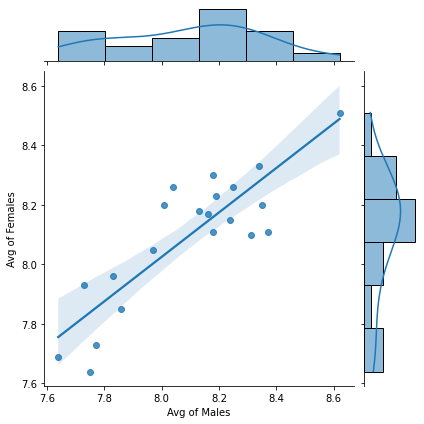

In [17]:
sns.jointplot(x="Avg of Males", y="Avg of Females", data=df_ratePerGenre, kind="reg");

Comparison of averages by genre


Text(0, 0.5, 'Rating')

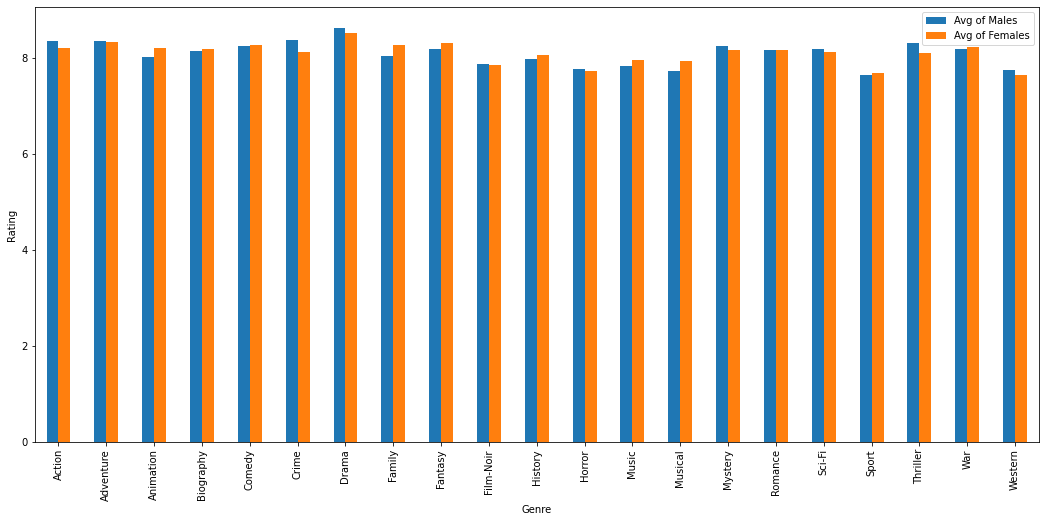

In [27]:
print ("Comparison of averages by genre")
df_ratePerGenre.plot(kind='bar',figsize=(18,8))
plt.xlabel('Genre')
plt.ylabel('Rating')

Text(0, 0.5, 'Rating')

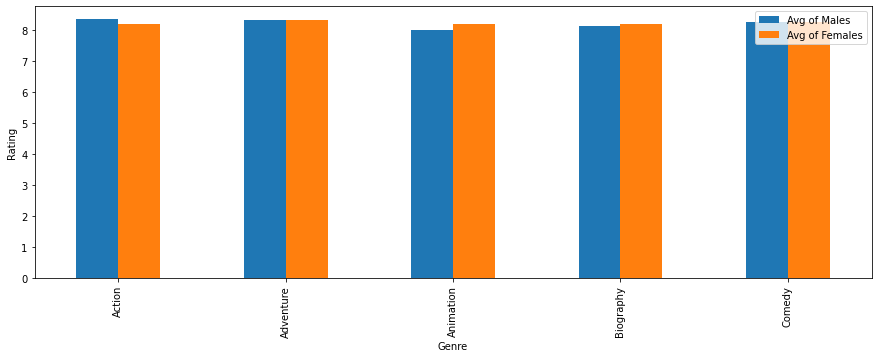

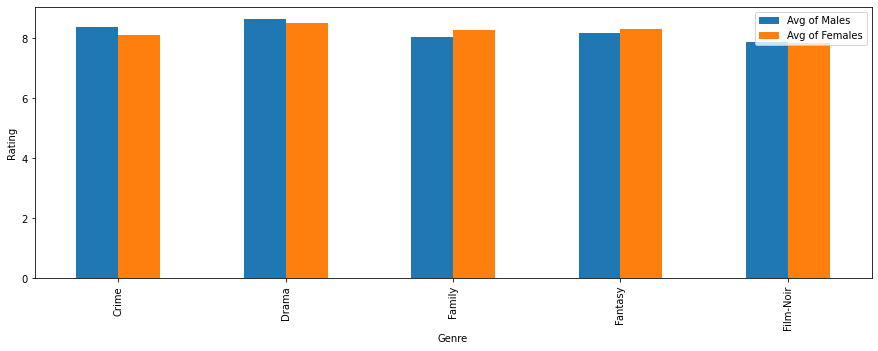

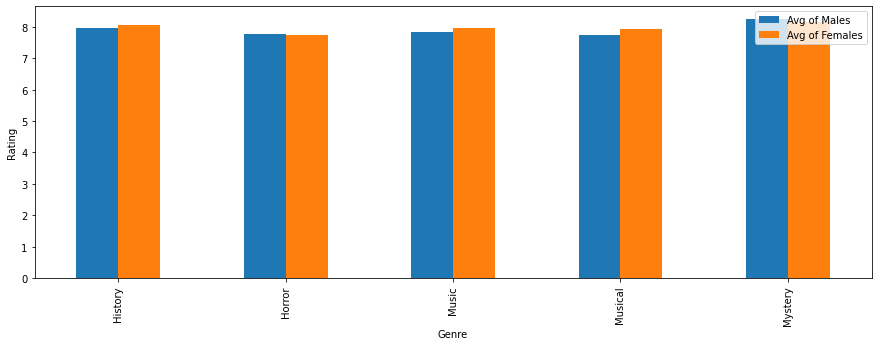

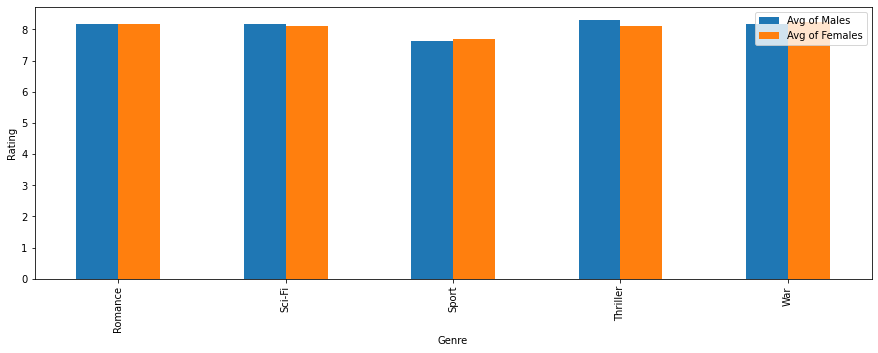

In [26]:
df_ratePerGenre[:5].plot(kind='bar',figsize=(15,5))
plt.xlabel('Genre')
plt.ylabel('Rating')
df_ratePerGenre[5:10].plot(kind='bar',figsize=(15,5))
plt.xlabel('Genre')
plt.ylabel('Rating')
df_ratePerGenre[10:15].plot(kind='bar',figsize=(15,5))
plt.xlabel('Genre')
plt.ylabel('Rating')
df_ratePerGenre[15:20].plot(kind='bar',figsize=(15,5))
plt.xlabel('Genre')
plt.ylabel('Rating')